In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from pandas import DataFrame
def import_data(filename):
    data = pd.read_csv(filename, sep=',')
    return data

# print(df.head())
df = import_data('../../datasets_clean/demographics.csv')
df = df[df['po_name'] == 'Boston']

df['zip'] = df['zip'].apply(lambda x: '{0:0>5}'.format(x))
# df.columns
df


,Unnamed: 0,zip,po_name,pop2010,pop2013,white,black,ameri_es,asian,hawn_pi,...,households,ave_hh_sz,hsehld_1_m,hsehld_1_f,marhh_chd,marhh_no_c,mhh_child,fhh_child,families,ave_fam_sz
8,8,02113,Boston,6455,6478,6110,45,13,164,3,...,4056,1.59,1517,1850,117,384,7,36,686,2.42
9,9,02114,Boston,12093,12176,9743,819,14,1139,2,...,7013,1.57,2464,2863,366,1045,19,82,1685,2.40
10,10,02115,Boston,26697,27239,18401,2295,67,4091,13,...,10128,1.73,3847,4116,364,1035,43,370,2158,2.58
11,11,02116,Boston,20161,20496,15538,1192,24,2666,3,...,10808,1.62,3710,3877,686,2050,42,178,3214,2.50
13,13,02118,Boston,26610,27320,13744,5462,93,4036,10,...,12465,1.95,4465,3469,974,1684,123,1085,4527,2.94
14,14,02127,Boston,32140,33507,26272,2003,73,1605,16,...,15344,2.06,4284,4999,1237,2283,148,1211,6048,2.88
15,15,02128,Boston,40508,41227,26243,1812,211,1449,19,...,14651,2.75,3130,2748,2643,2132,714,1706,8723,3.32
20,20,02108,Boston,3431,3533,3079,92,4,173,1,...,1761,1.71,568,628,161,357,2,16,565,2.71
21,21,02109,Boston,4189,4268,3714,125,5,233,0,...,2288,1.67,815,816,132,420,5,18,656,2.40
22,22,02110,Boston,1775,1823,1543,51,4,119,1,...,1068,1.60,365,317,48,274,6,20,385,2.28


In [3]:
# https://levelup.gitconnected.com/visualizing-housing-data-with-folium-maps-4718ed3452c2
import folium
import json
import numpy as np
def get_center_latlong(df):
    #center lat long of boston
    return (42.361145, -71.057083)
def plot_demographic_heatmap(df,col, output_path):
    # this line just to force our dataset zipcodes from numbers to strings so they match our geojson file
    df['zip'] = df['zip'].astype('str')


    # load my geojson file which contains my Polygons
    boundary_file = '../../datasets_clean/Boston_ZIP_Codes.geojson'
    with open(boundary_file, 'r') as f:
        zipcode_boundary = json.load(f)


    # Grab my map center again using our created fucntion (same as before)
    center = get_center_latlong(df)


    # Initialize Folium Map again (same as before)
    m = folium.Map(location=center, 
                   zoom_start=10)


    # Use the groupby method to 
    zipcode_data = df.groupby('zip').aggregate(np.mean)
    zipcode_data.reset_index(inplace = True)


    # Create choropleth map  
    folium.Choropleth(
        geo_data=zipcode_boundary,
        name='choropleth',
        data=zipcode_data,
        columns=['zip', col],
        key_on='feature.properties.ZIP5',
        fill_color='Spectral',
        fill_opacity=0.6,
        nan_fill_opacity=0,
        line_opacity=1,
        legend_name='Avg Population Density'
    ).add_to(m)


    m.save(output_path)

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'zip', 'po_name', 'pop2010', 'pop2013', 'white', 'black',
       'ameri_es', 'asian', 'hawn_pi', 'hispanic', 'other', 'mult_race',
       'males', 'females', 'age_under5', 'age_5_9', 'age_10_14', 'age_15_19',
       'age_20_24', 'age_25_34', 'age_35_44', 'age_45_54', 'age_55_64',
       'age_65_74', 'age_75_84', 'age_85_up', 'med_age', 'med_age_m',
       'med_age_f', 'households', 'ave_hh_sz', 'hsehld_1_m', 'hsehld_1_f',
       'marhh_chd', 'marhh_no_c', 'mhh_child', 'fhh_child', 'families',
       'ave_fam_sz'],
      dtype='object')


In [5]:
#plot demographic heat maps
plot_demographic_heatmap(df,'hispanic','maps/ethnicity/hispanic.html')
plot_demographic_heatmap(df,'white','maps/ethnicity/white.html')
plot_demographic_heatmap(df,'black','maps/ethnicity/black.html')
plot_demographic_heatmap(df,'ameri_es','maps/ethnicity/ameri_es.html')
plot_demographic_heatmap(df,'asian','maps/ethnicity/asian.html')
plot_demographic_heatmap(df,'hawn_pi','maps/ethnicity/hawn_pi.html')
plot_demographic_heatmap(df,'hispanic','maps/ethnicity/hispanic.html')
plot_demographic_heatmap(df,'other','maps/ethnicity/other.html')
plot_demographic_heatmap(df,'mult_race','maps/ethnicity/mult_race.html')


In [6]:
#graph population
plot_demographic_heatmap(df,'pop2013','maps/pop2013.html')

row is  hispanic      1751
white        14754
black          877
ameri_es        40
asian         4251
hawn_pi         10
hispanic      1751
other          466
mult_race      466
Name: 02215, dtype: int64


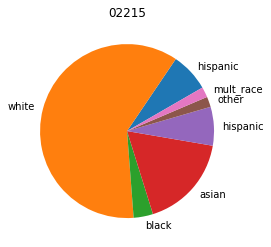

In [48]:
#https://stackoverflow.com/questions/41787006/making-multiple-pie-charts-out-of-a-pandas-dataframe-one-for-each-row/41787990
def demographic_by_zip(zipcode,df):
    df_race = df[['zip','hispanic','white','black','ameri_es','asian','hawn_pi','hispanic','other','mult_race']]
    df_race = df_race[df_race['zip']==zipcode]
    
    for i, (idx, row) in enumerate(df_race.set_index('zip').iterrows()):
        
        print('row is ',row)
        row = row[row.gt(row.sum() * .01)]
        plt.pie(row, labels=row.index, startangle=30)
        plt.title(idx)

    return
demographic_by_zip('02215',df)